### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1ro8ff5KZwErgkxIvb3D5ykp2l5nV75Yj/view?usp=sharing).


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [1]:
from google.colab import files
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
sns.set()

np.random.seed(42)

uploaded = files.upload()# to be able to choose what file i want to upload

Saving train-val.csv to train-val.csv


In [2]:
data = pd.read_csv("train-val.csv")# define data as the data that i uploaded to google colab in the previous block

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

2α) Παρουσιάζουμε το πλήθος των δειγμάτων μεσω της εντολής shape για το dataframe παίρνουμε των αριθμό των γραμμών που αντιστοιχεί στο πλήθος των παρατηρήσεων(δείγματος) και τις στήλες που αντιστοιχούν στο πλήθος των χαρακτηριστικών


In [3]:
data.shape

(7262, 24)

α)Το πλήθος των δειγμάτων είναι 7262 και το πλήθος των χαρακτηριστικών 24

 ⚠️ Κατά την προεπεξεργασία του συνόλου δεδομένων (τόσο του train-val όσο και
του test) **MHN ΑΦΑΙΡΕΣΕΤΕ ΤΗΝ ΣΤΗΛΗ ID**  διότι χρειάζεται για τον διαγωνισμό kaggle.

2β)Με την βοήθεια της εντολής dtypes παίρνουμε τα data types

In [4]:
data.dtypes

,0
ID,int64
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64


2γ)Χρησιμοποιούμε την εντολή data.columns.tolist() για τις ετικέτες, οι οποίες φαίνονται και στο προηγούμενο ερώτημα

In [5]:
data.columns.tolist()


['ID',
 'Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

2δ)Πλήθος των κατηγοριών.Αρχικά θα δούμε τις 5 πρώτες στήλες για να έχουμε μια καλύτερη εικόνα για τα δεδομένα

In [6]:
pd.set_option('display.max_columns', None)#function provided by pandas in order to specify display options , in this case we used display.max_columns to see all the columns and none to tell pandas not to limit the columns that are about to be desplayed
data.head()#see the first 5 rows

,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3423,2016-03-04,Tuggeranong,14.4,32.2,11.0,NaN,NaN,NE,22.0,NaN,NNW,0.0,11.0,81.0,32.0,1021.6,1018.0,NaN,NaN,18.4,31.2,1,0
1,6095,2013-06-23,GoldCoast,11.0,21.5,0.0,NaN,NaN,S,43.0,S,SSE,15.0,30.0,64.0,58.0,1024.1,1021.2,NaN,NaN,17.1,20.2,0,0
2,403,2009-07-05,Cobar,8.3,14.7,0.0,2.4,7.4,SSW,24.0,SSW,SSW,13.0,7.0,79.0,55.0,1021.8,1019.7,7.0,6.0,10.6,14.0,0,0
3,333,2014-10-12,BadgerysCreek,8.8,32.2,0.0,NaN,NaN,ENE,37.0,SSW,NNE,2.0,15.0,65.0,18.0,1017.5,1011.7,NaN,NaN,17.7,30.9,0,0
4,2085,2012-07-04,Sydney,7.2,16.2,0.0,3.6,6.4,NaN,NaN,W,SSW,28.0,26.0,55.0,43.0,1024.6,1025.1,3.0,7.0,9.6,15.9,0,1


Από τα παραπάνω δεν μπορούμε να συμπεράνουμε τίποτα για τις κατηγορικές μεταβλητές όμως έχουμε κάποιες ενδείξεις για παράδειγμα:



*   Location(μπορεί να θεωρηθεί ως κατηγορική εάν έχουμε περιορισμένο αριθμό περιοχών
*   Wind*


*  Rain*
*  Date:τα έτη εφόσον διασπαστούν

Πρέπει να εξετάσουμε πόσες διακριτές τιμές υπάρχουν για κάθε χαρακτηριστικό
Προτού το κάνουμε αυτό πρώτα θα χωρίσουμε το χαρακτηριστηκό ημερομηνία σε χρονιά και σε μέρα του χρόνου (day  ∈ {1,2,...,366\})


In [7]:

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d', errors='coerce')

# Create a new feature for the day of the year (1-366)
data['DayOfYear'] = data['Date'].dt.dayofyear

# Create a new feature for the year
data['Year'] = data['Date'].dt.year

# Drop the original 'Date' column
data.drop(columns=['Date'], inplace=True)

#we are not wet sure how many are of the columns contain categorical variables, so i will apply the command unique to see how many unique values there are in each column
for column in data.columns:
  print(f"Unique values in {column}:")
  print(column,data[column].nunique())

Unique values in ID:
ID 7262
Unique values in Location:
Location 49
Unique values in MinTemp:
MinTemp 326
Unique values in MaxTemp:
MaxTemp 375
Unique values in Rainfall:
Rainfall 240
Unique values in Evaporation:
Evaporation 149
Unique values in Sunshine:
Sunshine 137
Unique values in WindGustDir:
WindGustDir 16
Unique values in WindGustSpeed:
WindGustSpeed 52
Unique values in WindDir9am:
WindDir9am 16
Unique values in WindDir3pm:
WindDir3pm 16
Unique values in WindSpeed9am:
WindSpeed9am 33
Unique values in WindSpeed3pm:
WindSpeed3pm 36
Unique values in Humidity9am:
Humidity9am 98
Unique values in Humidity3pm:
Humidity3pm 100
Unique values in Pressure9am:
Pressure9am 418
Unique values in Pressure3pm:
Pressure3pm 404
Unique values in Cloud9am:
Cloud9am 9
Unique values in Cloud3pm:
Cloud3pm 10
Unique values in Temp9am:
Temp9am 344
Unique values in Temp3pm:
Temp3pm 368
Unique values in RainToday:
RainToday 2
Unique values in RainTomorrow:
RainTomorrow 2
Unique values in DayOfYear:
DayOfY

2ε)Τώρα θα δούμε πόσα δείγματα ανήκουν σε κάθε κατηγορία, αυτό θα μας διευκολύνει να αποφασίσουμε ποιες μεταβλητές θα θεωρήσουμε ώς κατηγορικές(τα χαρακτηρηστικά που δεν θα θεωρήσω ως κατηγορικά σίγουρα , δεν ελεγχθούν)

In [8]:
# Display counts of samples for each binary categorical variable
print("Counts for binary categorical variables:")
print(data['RainToday'].value_counts())
print(data['RainTomorrow'].value_counts())
print()

# Display counts of samples for each label in one-hot encoded categorical variables
print("Counts for one-hot encoded categorical variables:")

# Iterate through the original categorical columns before encoding
categorical_columns = ['Year','Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Cloud9am', 'Cloud3pm']

for column in categorical_columns:
    print(f"\nCounts of samples in each category for '{column}':")
    print(data[column].value_counts())


Counts for binary categorical variables:
RainToday
0    5600
1    1662
Name: count, dtype: int64
RainTomorrow
0    5623
1    1639
Name: count, dtype: int64

Counts for one-hot encoded categorical variables:

Counts of samples in each category for 'Year':
Year
2014    898
2013    894
2016    892
2015    879
2010    874
2009    830
2012    771
2011    732
2017    389
2008    102
2007      1
Name: count, dtype: int64

Counts of samples in each category for 'Location':
Location
Brisbane            184
Bendigo             180
Sydney              178
Portland            176
Nuriootpa           173
MountGambier        171
AliceSprings        169
Perth               169
Canberra            168
WaggaWagga          167
Moree               166
Albany              165
SydneyAirport       163
Darwin              161
Cairns              159
Richmond            158
SalmonGums          158
Woomera             158
Mildura             158
NorfolkIsland       157
PerthAirport        157
Dartmoor         

Βλέπουμε ότι σε κάποιες κατηγορίες υπάρχει μόνο μια τιμή ,οπότε για να έχουμε πιο συμπαγές δεδομένα θα διαγράψουμε αυτές τις γραμμές από το σύνολο δεδομένων.

In [9]:
data = data[data['Cloud3pm'] != 9.0]

data = data[data['Year'] != 2007]

2στ)Συσχέτιση δεδομένων

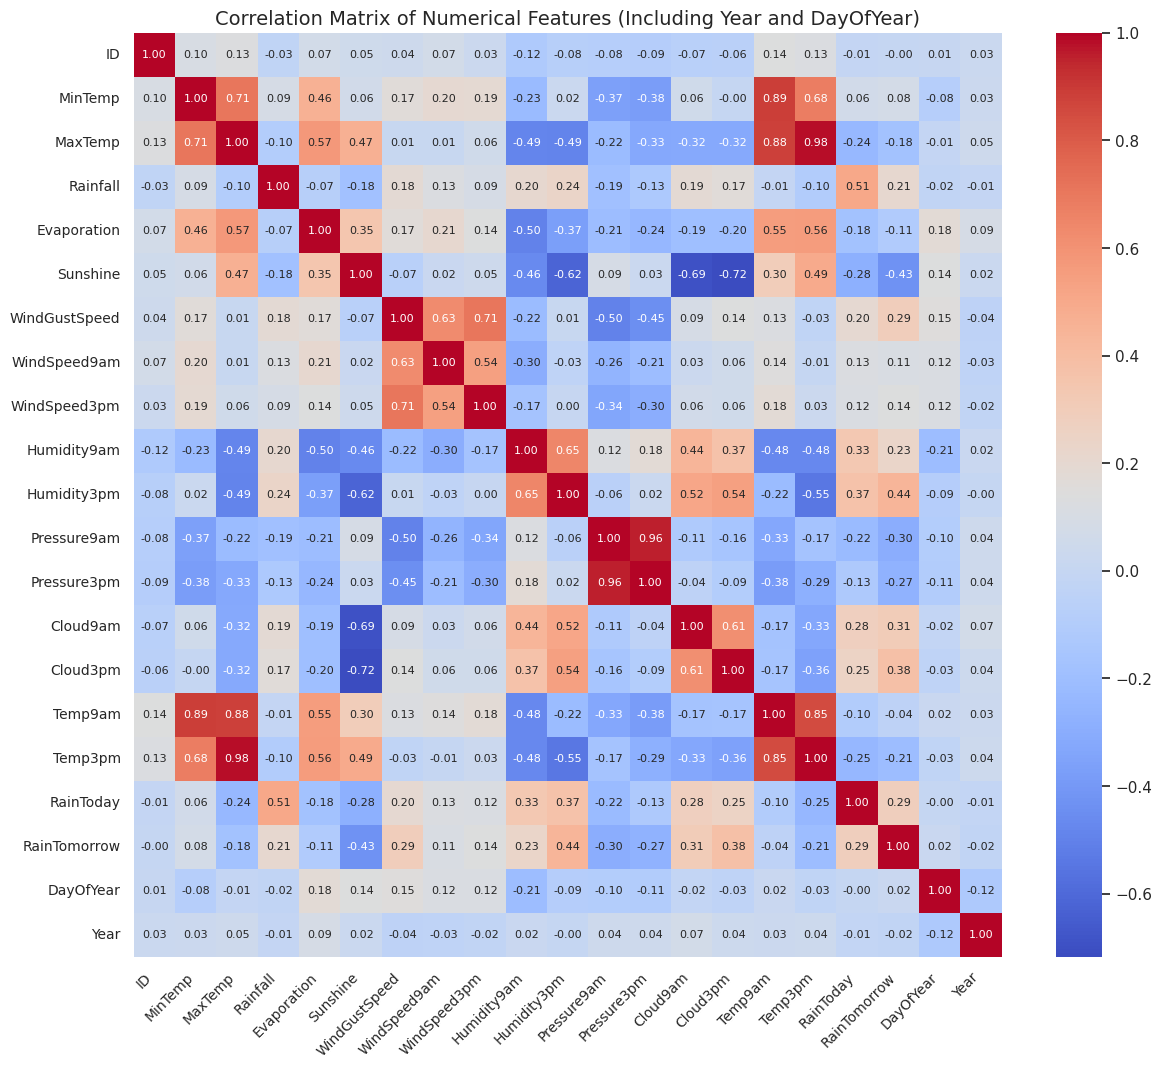

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Ensure 'Year' and 'DayOfYear' are of numerical type (int64)
data['Year'] = data['Year'].astype(int)
data['DayOfYear'] = data['DayOfYear'].astype(int)

#Select only numerical columns, including 'Year' and 'DayOfYear'
numerical_data = data.select_dtypes(include=['int64', 'float64'])

#Calculate the correlation matrix
corr = numerical_data.corr()

#Plot the heatmap with improved readability
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Matrix of Numerical Features (Including Year and DayOfYear)", fontsize=14)
plt.show()


In [11]:
corr_unstacked = corr.unstack()
corr_sorted = corr_unstacked.sort_values(key=lambda x: abs(x), ascending=False)

#Remove self-correlations (correlation of a feature with itself)
corr_sorted = corr_sorted[corr_sorted < 1]

#Display the ranked feature pairs
print("\nRanked Feature Pairs by Absolute Correlation:")
print(corr_sorted.head(20))


Ranked Feature Pairs by Absolute Correlation:
Temp3pm        MaxTemp          0.983118
MaxTemp        Temp3pm          0.983118
Pressure9am    Pressure3pm      0.959440
Pressure3pm    Pressure9am      0.959440
MinTemp        Temp9am          0.888773
Temp9am        MinTemp          0.888773
MaxTemp        Temp9am          0.881889
Temp9am        MaxTemp          0.881889
               Temp3pm          0.851318
Temp3pm        Temp9am          0.851318
Sunshine       Cloud3pm        -0.717159
Cloud3pm       Sunshine        -0.717159
MinTemp        MaxTemp          0.709920
MaxTemp        MinTemp          0.709920
WindGustSpeed  WindSpeed3pm     0.706901
WindSpeed3pm   WindGustSpeed    0.706901
Sunshine       Cloud9am        -0.691214
Cloud9am       Sunshine        -0.691214
Temp3pm        MinTemp          0.679394
MinTemp        Temp3pm          0.679394
dtype: float64


Ταξινομόντας τις δυάδες ως προς την πιο υψηλή συσχέτιση βλέπουμε ότι έχουμε την Θερμοκρασία το πρωι και την θερμοκρασία το μεσημέρι να έχουν αρκετά υψηλή συσχέτηση με την μέγιστη και ελάχιστη θερμοκρασία μέσα στη μέρα.Το ίδιο ισχύει και για την πρωινή με την απογευματινή πίεση.Μπορούμε να συμπεριλάβουμε χαρακτηριστηκό από το κάθε ζεύγος.

2ζ)Επιπλέον πληροφορίες για το dataset

In [12]:
data.describe()

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DayOfYear,Year
count,7260.000000,7235.000000,7249.000000,7260.000000,4221.000000,3815.000000,6787.000000,7205.000000,7126.000000,7183.000000,7092.000000,6574.000000,6573.000000,4590.000000,4441.000000,7226.000000,7140.000000,7260.000000,7260.000000,7260.000000,7260.000000
mean,4849.560744,10.637913,21.522803,2.303388,4.696778,7.355596,39.160012,13.673976,18.227337,70.245441,52.369148,1018.910040,1016.470470,4.367538,4.488178,15.425630,20.079818,0.228926,0.225620,196.804132,2012.752342
std,2787.203710,5.994963,6.482192,8.028429,3.760998,3.539875,13.848163,8.918357,8.859715,18.807716,20.006492,7.062725,6.989302,2.910257,2.714062,6.080117,6.367098,0.420170,0.418019,79.957333,2.506768
min,2.000000,-7.600000,-3.700000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,1.000000,990.800000,989.900000,0.000000,0.000000,-5.200000,-4.100000,0.000000,0.000000,60.000000,2008.000000
25%,2440.500000,6.400000,16.900000,0.000000,2.200000,4.900000,30.000000,7.000000,11.000000,58.000000,38.000000,1014.300000,1011.800000,1.000000,2.000000,11.200000,15.600000,0.000000,0.000000,128.000000,2011.000000
50%,4857.000000,10.300000,20.800000,0.000000,4.000000,8.200000,37.000000,13.000000,17.000000,71.000000,53.000000,1019.000000,1016.600000,5.000000,5.000000,14.900000,19.300000,0.000000,0.000000,196.000000,2013.000000
75%,7246.250000,14.500000,25.800000,0.800000,6.400000,10.200000,46.000000,19.000000,24.000000,85.000000,66.000000,1023.600000,1021.200000,7.000000,7.000000,19.300000,24.200000,0.000000,0.000000,267.000000,2015.000000
max,9683.000000,28.100000,42.800000,174.600000,50.800000,13.600000,104.000000,65.000000,83.000000,100.000000,100.000000,1040.200000,1036.700000,8.000000,8.000000,36.500000,41.700000,1.000000,1.000000,335.000000,2017.000000


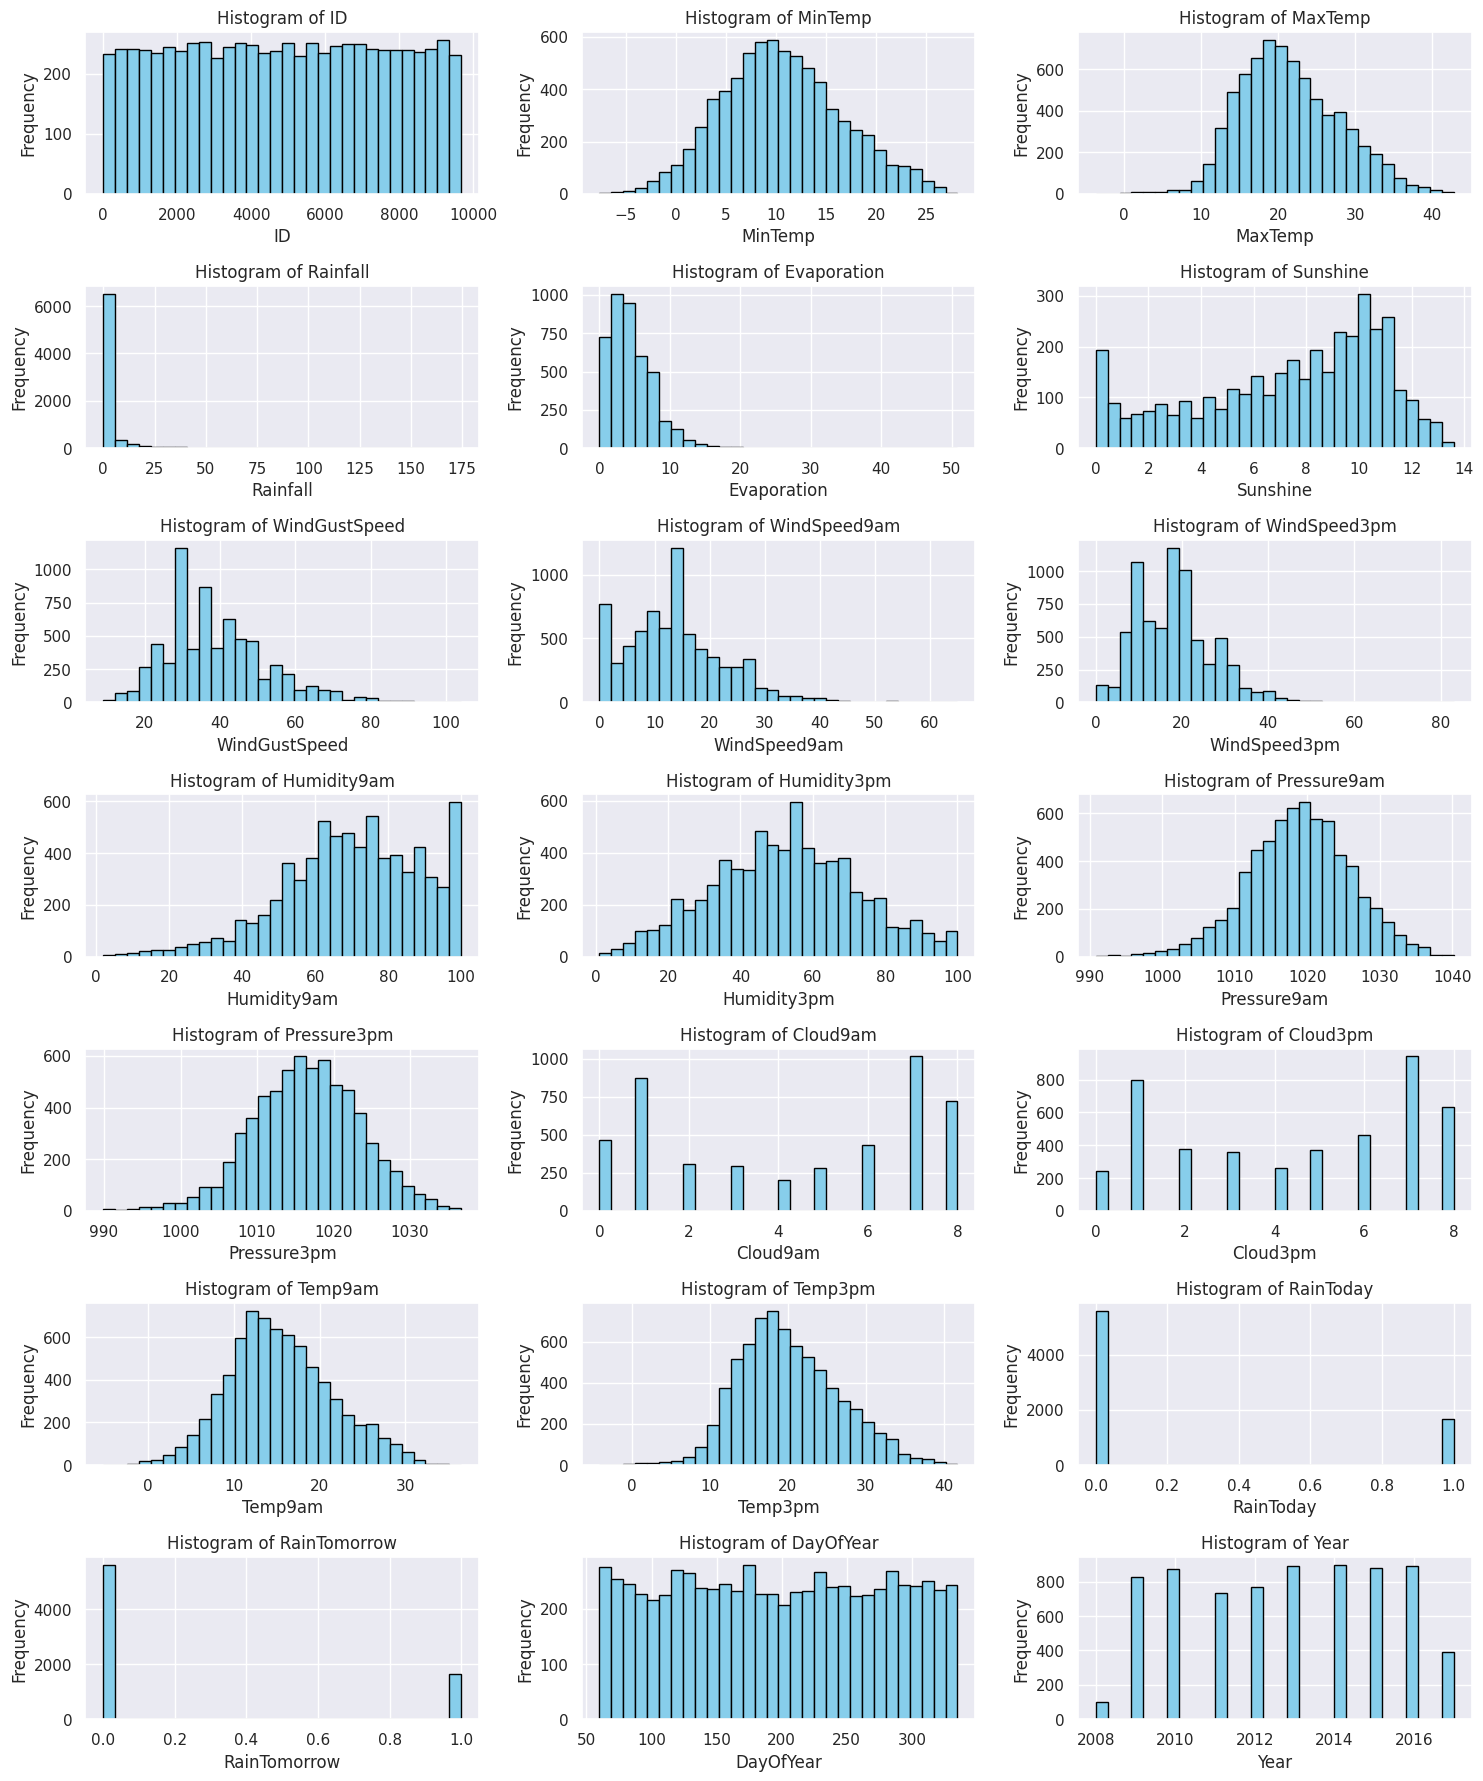

In [13]:
#histograms for all the numerical values
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Set up the plotting area
num_columns = len(numerical_data.columns)
fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_data.columns):
    axes[i].hist(numerical_data[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


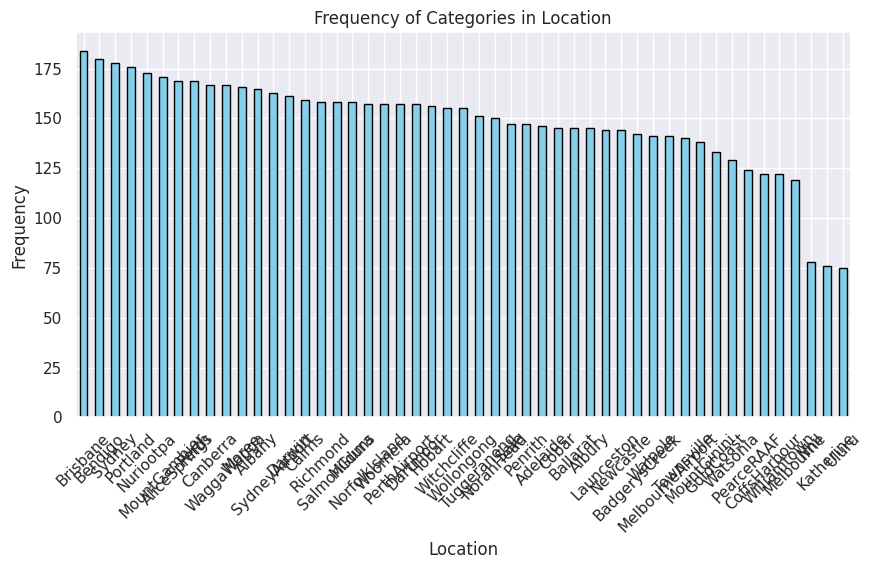

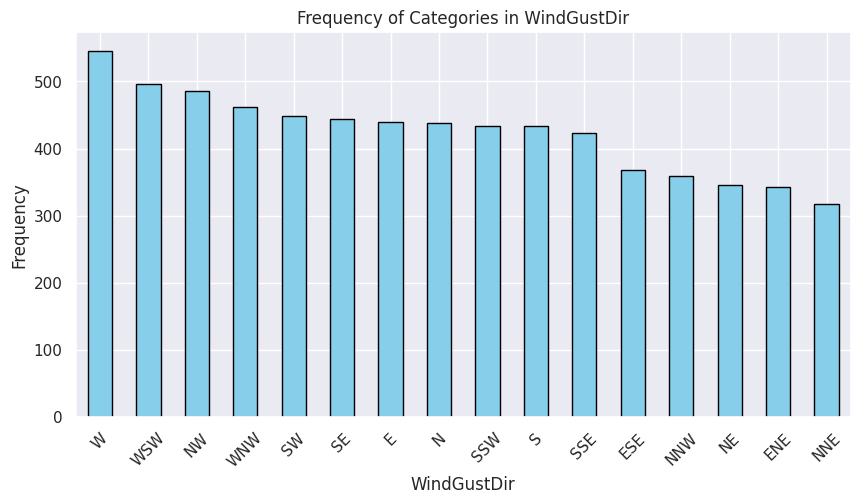

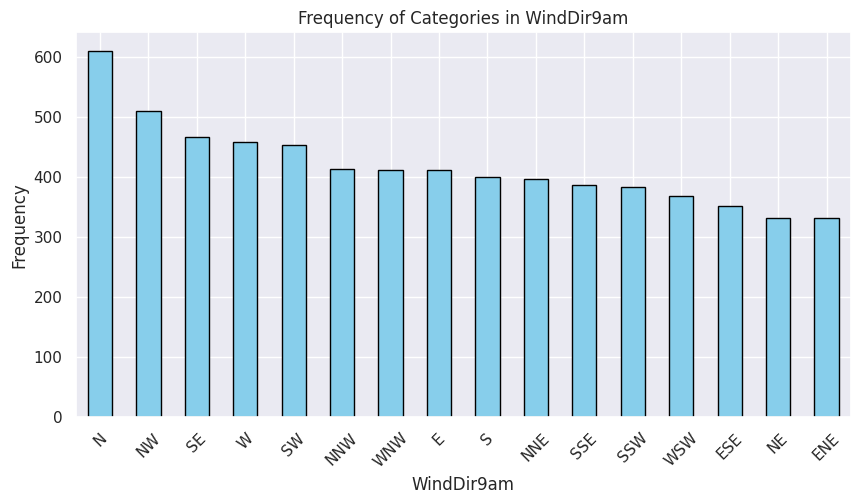

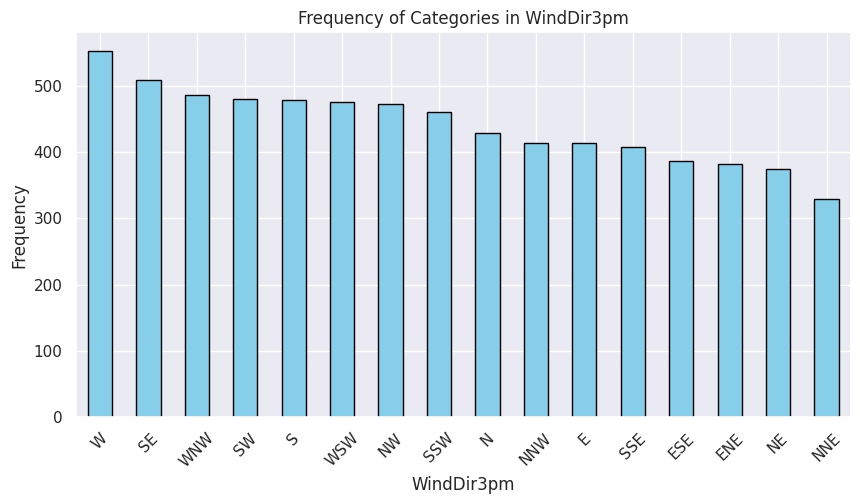

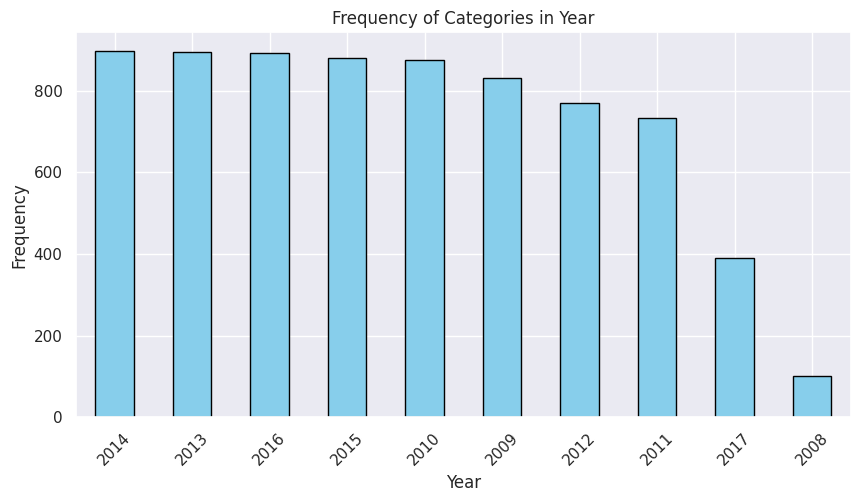

In [14]:
#frequency for all the categorical variables
# Identify the categorical columns
data['Year'] = data['Year'].astype('category')
categorical_columns = data.select_dtypes(include=['category', 'object']).columns


# Plot bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Frequency of Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


Για τα αριθμητικά χαρακτηριστικά φτιάχνουμε ιστόγραμμα για να ελέγξουμε εάν υπάρχουν ενδείξεις κανονικότητας και για τις κατηγορικές διαγράμματα συχνότητας)

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [15]:
#Check Missing Values for Temperature Features
print("Missing values before filling:")
print(data[['MaxTemp', 'MinTemp', 'Temp3pm', 'Temp9am']].isnull().sum())

#Fill Missing Values in 'MaxTemp' and 'MinTemp' Using 'Temp3pm' and 'Temp9am'
#Fill missing 'MaxTemp' using 'Temp3pm' if available
data['MaxTemp'] = np.where(data['MaxTemp'].isnull(), data['Temp3pm'], data['MaxTemp'])

#Fill missing 'MinTemp' using 'Temp9am' if available
data['MinTemp'] = np.where(data['MinTemp'].isnull(), data['Temp9am'], data['MinTemp'])

#Check missing values after filling
print("\nMissing values after filling:")
print(data[['MaxTemp', 'MinTemp']].isnull().sum())

#Drop 'Temp3pm' and 'Temp9am' After Filling
data.drop(columns=['Temp3pm', 'Temp9am'], inplace=True)

#Create New Feature 'Pressure' Using Conditional Mean Calculation
#Calculate 'Pressure' as the mean of 'Pressure9am' and 'Pressure3pm' if both exist, otherwise take the non-missing value
data['Pressure'] = np.where(
    data['Pressure9am'].notnull() & data['Pressure3pm'].notnull(),
    data[['Pressure9am', 'Pressure3pm']].mean(axis=1),
    data['Pressure9am'].fillna(data['Pressure3pm'])
)

#Drop the original 'Pressure9am', 'Pressure3pm', 'Location' and 'RainToday' since columns
data.drop(columns=['Pressure9am', 'Pressure3pm','RainToday','Location','Year'], inplace=True)
#We droped RainToday since this information is covered in more detail form rainfall
#We droped Location since it has many different categories and it will have overfitting problems to our training algorithms
#and although it affects the target label this information is already included in the other characteristics
#in a large degree
#Location affects the weather conditions in general but the prediction of Raintomorrow
#has an indirect realtion with location.
#Also year doesnt have a big impact on if its going to rain tomorrow.

Missing values before filling:
MaxTemp     11
MinTemp     25
Temp3pm    120
Temp9am     34
dtype: int64

Missing values after filling:
MaxTemp     6
MinTemp    13
dtype: int64


In [16]:
#count of pressure missing values
print(data['Pressure'].isnull().sum())


681


3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [17]:
data.isnull().sum()


,0
ID,0
MinTemp,13
MaxTemp,6
Rainfall,0
Evaporation,3039
Sunshine,3445
WindGustDir,475
WindGustSpeed,473
WindDir9am,570
WindDir3pm,213


In [18]:
data.head()

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainTomorrow,DayOfYear,Pressure
0,3423,14.4,32.2,11.0,NaN,NaN,NE,22.0,NaN,NNW,0.0,11.0,81.0,32.0,NaN,NaN,0,64,1019.80
1,6095,11.0,21.5,0.0,NaN,NaN,S,43.0,S,SSE,15.0,30.0,64.0,58.0,NaN,NaN,0,174,1022.65
2,403,8.3,14.7,0.0,2.4,7.4,SSW,24.0,SSW,SSW,13.0,7.0,79.0,55.0,7.0,6.0,0,186,1020.75
3,333,8.8,32.2,0.0,NaN,NaN,ENE,37.0,SSW,NNE,2.0,15.0,65.0,18.0,NaN,NaN,0,285,1014.60
4,2085,7.2,16.2,0.0,3.6,6.4,NaN,NaN,W,SSW,28.0,26.0,55.0,43.0,3.0,7.0,1,186,1024.85


In [19]:
from sklearn.impute import SimpleImputer

imputer_numerical = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')


3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder_categorical = OneHotEncoder(handle_unknown='ignore')

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

norm_scaler = StandardScaler()
uniform_scaler = MinMaxScaler()
unknown_scaler = RobustScaler()
#We will consider Temp,Pressure and Humiditty as normal data
normal_data = ['MinTemp','MaxTemp','Pressure','Humidity9am','Humidity3pm']
uniform_data = ['DayOfYear']
unknown_data = ['Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Cloud9am','Cloud3pm']

In [22]:
data.dtypes

,0
ID,int64
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


In [23]:
#Define numerical and categorical columns separately for imputation
numerical_columns = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure'
]

categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

#Updated imputation function using the original DataFrame 'data'
def impute_by_day_of_year(data, feature, is_categorical=False):
    for day in data['DayOfYear'].unique():
        #Filter data for the current 'DayOfYear'
        day_data = data[data['DayOfYear'] == day]

        if is_categorical:
            #Use the most frequent value (mode) for categorical features
            mode_value = day_data[feature].mode()[0] if not day_data[feature].mode().empty else np.nan
            data.loc[(data['DayOfYear'] == day) & (data[feature].isnull()), feature] = mode_value
        else:
            #Use the mean for numerical features
            mean_value = day_data[feature].mean()
            data.loc[(data['DayOfYear'] == day) & (data[feature].isnull()), feature] = mean_value

#Apply imputation for numerical features
for feature in numerical_columns:
    impute_by_day_of_year(data, feature, is_categorical=False)

#Apply imputation for categorical features
for feature in categorical_columns:
    impute_by_day_of_year(data, feature, is_categorical=True)

#Drop any remaining rows with missing values
data.dropna(inplace=True)

#Output the shape of the DataFrame
data_shape = data.shape

#Display the final shape of the DataFrame
print("The shape of the DataFrame after imputation and dropping missing values:", data_shape)


The shape of the DataFrame after imputation and dropping missing values: (7260, 19)


In [24]:
#Drop rows with any remaining missing values
data.dropna(inplace=True)

#Output the shape of the DataFrame after dropping missing values
data_shape = data.shape

#Display the shape of the DataFrame
data_shape


(7260, 19)

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


excluded = ['ID','RainTomorrow']

numeric = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed',
           'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Cloud9am',
           'Cloud3pm','DayOfYear','Pressure']

categorical = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
# Define the numerical transformers for different data types
normal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', norm_scaler)
])

uniform_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', uniform_scaler)
])

unknown_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', unknown_scaler)
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('normal', normal_transformer, normal_data),
        ('uniform', uniform_transformer, uniform_data),
        ('unknown', unknown_transformer, unknown_data),
        ('cat', categorical_transformer, categorical),
        ('passthrough', 'passthrough', excluded)#do not transform id

    ]
)

data_transformed = preprocessor.fit_transform(data)

# Fit and transform the data
data_transformed = preprocessor.fit_transform(data)

# Define the list of feature names
# Combine the lists of numerical features
numerical_features = normal_data + uniform_data + unknown_data

# Retrieve the names of the one-hot encoded categorical features
categorical_column_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical)

# Combine all feature names, including the passthrough 'ID' column
all_feature_names = numerical_features + list(categorical_column_names) + excluded

# If the result is a sparse array, convert it to a dense format
if hasattr(data_transformed, "toarray"):
    data_transformed = data_transformed.toarray()

# Create the final DataFrame
transformed_data = pd.DataFrame(data_transformed, columns=all_feature_names)

print(transformed_data.head())



    MinTemp   MaxTemp  Pressure  Humidity9am  Humidity3pm  DayOfYear  \
0  0.626653  1.647885  0.313760     0.574253    -1.029114   0.014545   
1  0.059022 -0.002642  0.741008    -0.333892     0.284428   0.414545   
2 -0.391743 -1.051574  0.456176     0.467412     0.132865   0.458182   
3 -0.308268  1.647885 -0.465780    -0.280472    -1.736406   0.818182   
4 -0.575389 -0.820192  1.070813    -0.814675    -0.473385   0.458182   

   Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.75     0.509408  0.175824      -0.937500     -1.083333     -0.461538   
1      0.00    -0.349342 -0.484545       0.375000      0.166667      1.000000   
2      0.00    -0.461842 -0.060150      -0.812500      0.000000     -0.769231   
3      0.00     0.568236 -0.055523       0.000000     -0.916667     -0.153846   
4      0.00    -0.124342 -0.360902      -0.377604      1.250000      0.692308   

   Cloud9am  Cloud3pm  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0  0.2

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [26]:
y = transformed_data['RainTomorrow']  #The target value of our data
ids = transformed_data['ID'] #The id of each sample is excluded from training
X = transformed_data.drop(columns=['RainTomorrow','ID'])  #The features of our dataset

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [27]:
from sklearn.model_selection import train_test_split

#Split X and y to train and valid
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=200, stratify=y
)

#Check the shape of the data
print(f"Σχήμα του X_train: {X_train.shape}")
print(f"Σχήμα του X_valid: {X_valid.shape}")
print(f"Σχήμα του y_train: {y_train.shape}")
print(f"Σχήμα του y_valid: {y_valid.shape}")


Σχήμα του X_train: (5082, 62)
Σχήμα του X_valid: (2178, 62)
Σχήμα του y_train: (5082,)
Σχήμα του y_valid: (2178,)


### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [28]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB                   # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier           # K-Nearest Neighbors (KNN)
from sklearn.linear_model import LogisticRegression          # Logistic Regression
from sklearn.neural_network import MLPClassifier             # Multi-layer Perceptron (MLP)
from sklearn.svm import SVC                                  # Support Vector Classifier (SVC)
from sklearn.tree import DecisionTreeClassifier              # Decision Tree
from sklearn.ensemble import RandomForestClassifier          # Random Forest

In [29]:
#Set up a dictionary that contains all the classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train  each classifier
for c_name, c in classifiers.items():
    c.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [30]:
#Initialise a predictions library
predictions = {}
#Use each trained classifier in order to predict the label from the test set
for c_name, c in classifiers.items():
    y_pred = c.predict(X_valid) #Predict on the test set for each classifier
    predictions[c_name] = y_pred #Store the predictions for each variable



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

# Dictionary to store metrics for each classifier
metrics_scores = {}

# Loop through each classifier and calculate the metrics
for c_name, c in classifiers.items():
    if c_name in predictions:
        y_pred = predictions[c_name]

        # Calculate overall metrics
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred, average='weighted')
        recall = recall_score(y_valid, y_pred, average='weighted')
        f1 = f1_score(y_valid, y_pred, average='weighted')

        # Calculate class-wise accuracy using the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
        accuracy_class_0 = tn / (tn + fp)
        accuracy_class_1 = tp / (tp + fn)

        # Store the results in the dictionary
        metrics_scores[c_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy Class 0': accuracy_class_0,
            'Accuracy Class 1': accuracy_class_1
        }
    else:
        # If predictions are missing, store "No predictions"
        metrics_scores[c_name] = {
            'Accuracy': "No predictions",
            'Precision': "No predictions",
            'Recall': "No predictions",
            'F1 Score': "No predictions",
            'Accuracy Class 0': "No predictions",
            'Accuracy Class 1': "No predictions"
        }

# Prepare the table for printing
metrics_table = [
    [
        c_name,
        f"{scores['Accuracy']:.5f}" if isinstance(scores['Accuracy'], float) else scores['Accuracy'],
        f"{scores['Precision']:.5f}" if isinstance(scores['Precision'], float) else scores['Precision'],
        f"{scores['Recall']:.5f}" if isinstance(scores['Recall'], float) else scores['Recall'],
        f"{scores['F1 Score']:.5f}" if isinstance(scores['F1 Score'], float) else scores['F1 Score'],
        f"{scores['Accuracy Class 0']:.5f}" if isinstance(scores['Accuracy Class 0'], float) else scores['Accuracy Class 0'],
        f"{scores['Accuracy Class 1']:.5f}" if isinstance(scores['Accuracy Class 1'], float) else scores['Accuracy Class 1']
    ]
    for c_name, scores in metrics_scores.items()
]

# Print the results in a formatted table
print(tabulate(metrics_table, headers=["Classifier", "Accuracy", "Precision", "Recall", "F1 Score", "Accuracy Class 0", "Accuracy Class 1"], tablefmt="pretty"))


+---------------------------+----------+-----------+---------+----------+------------------+------------------+
|        Classifier         | Accuracy | Precision | Recall  | F1 Score | Accuracy Class 0 | Accuracy Class 1 |
+---------------------------+----------+-----------+---------+----------+------------------+------------------+
|        Naive Bayes        | 0.71488  |  0.77605  | 0.71488 | 0.73386  |     0.73088      |     0.65988      |
|    K-Nearest Neighbors    | 0.81726  |  0.80249  | 0.81726 | 0.80468  |     0.92650      |     0.44196      |
|    Logistic Regression    | 0.84848  |  0.83959  | 0.84848 | 0.84006  |     0.93954      |     0.53564      |
|  Multi-layer Perceptron   | 0.82048  |  0.81689  | 0.82048 | 0.81851  |     0.89271      |     0.57230      |
| Support Vector Classifier | 0.84206  |  0.83175  | 0.84206 | 0.82892  |     0.94961      |     0.47251      |
|       Decision Tree       | 0.77594  |  0.78022  | 0.77594 | 0.77796  |     0.84766      |     0.52953

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


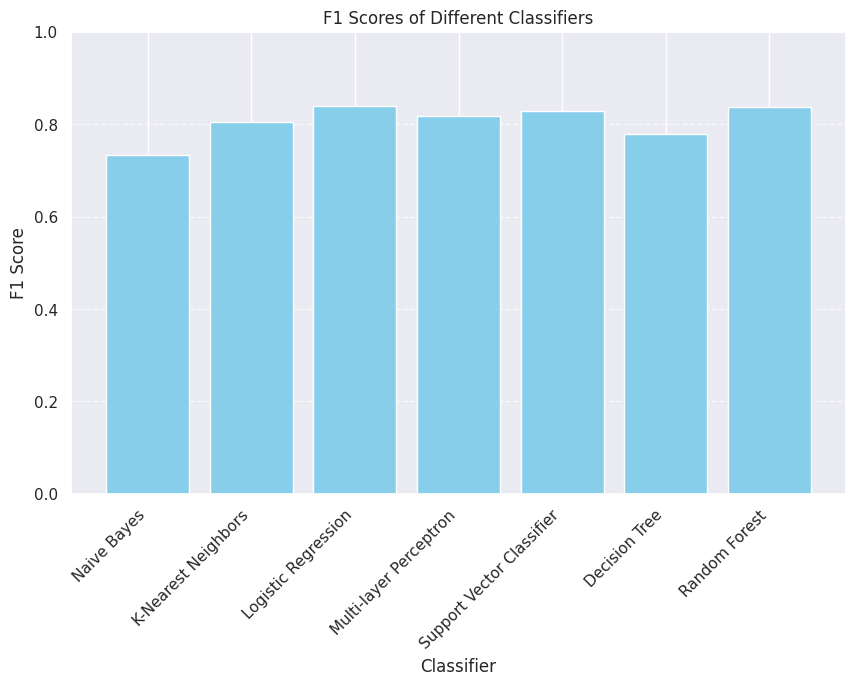

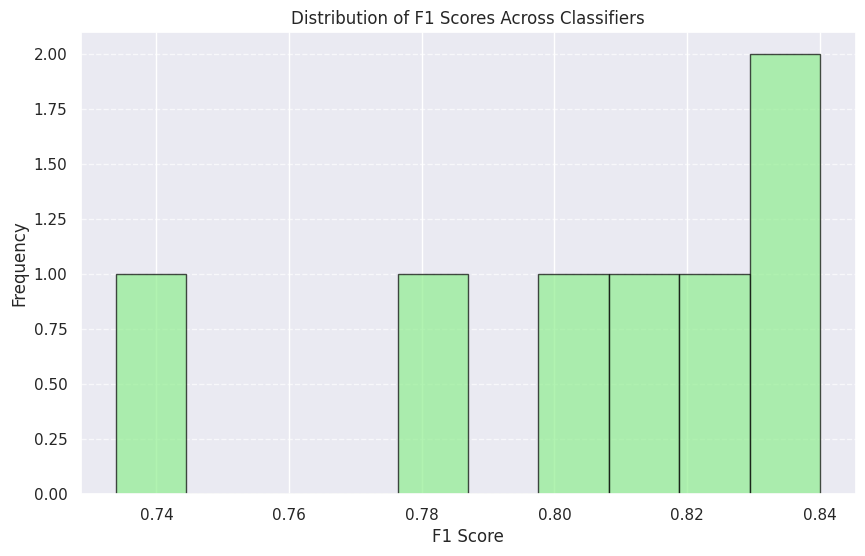

In [32]:
import matplotlib.pyplot as plt

# Extract classifier names and F1 scores for plotting
classifiers = list(metrics_scores.keys())
f1_scores = [scores['F1 Score'] for scores in metrics_scores.values()]

# Filter out classifiers with missing F1 scores
valid_classifiers = [c for c, f1 in zip(classifiers, f1_scores) if isinstance(f1, float)]
valid_f1_scores = [f1 for f1 in f1_scores if isinstance(f1, float)]

# Create a bar plot for F1 scores
plt.figure(figsize=(10, 6))
plt.bar(valid_classifiers, valid_f1_scores, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("F1 Scores of Different Classifiers")
plt.xlabel("Classifier")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a histogram for F1 scores
plt.figure(figsize=(10, 6))
plt.hist(valid_f1_scores, bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of F1 Scores Across Classifiers")
plt.xlabel("F1 Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

In [33]:

# Step 1: Upload the test set file from local storage
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/14HsEya9h1wxk2wJLh6c0Ibz2V4_WA13p/view?usp=sharing).


In [34]:


#first we need to load the dataset
test_data = pd.read_csv("test.csv")

#we should then apply exactly the same transformations to the columns (numeric and categorical)
#fill the missing values and scale the data

#Convert 'Date' to datetime format and extract 'DayOfYear'
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%Y-%m-%d', errors='coerce')
test_data['DayOfYear'] = test_data['Date'].dt.dayofyear
test_data.drop(columns=['Date'], inplace=True)

#Drop unwanted columns from test_data
test_data.drop(columns=['Location', 'RainToday', 'Year'], inplace=True, errors='ignore')


#Create the 'Pressure' feature using 'Pressure9am' and 'Pressure3pm'
test_data['Pressure'] = np.where(
    test_data['Pressure9am'].notnull() & test_data['Pressure3pm'].notnull(),
    test_data[['Pressure9am', 'Pressure3pm']].mean(axis=1),
    test_data['Pressure9am'].fillna(test_data['Pressure3pm'])
)

#Drop 'Pressure9am' and 'Pressure3pm'
test_data.drop(columns=['Pressure9am', 'Pressure3pm'], inplace=True, errors='ignore')

#Fill missing values in 'MaxTemp' and 'MinTemp' using 'Temp3pm' and 'Temp9am'
test_data['MaxTemp'] = np.where(test_data['MaxTemp'].isnull(), test_data['Temp3pm'], test_data['MaxTemp'])
test_data['MinTemp'] = np.where(test_data['MinTemp'].isnull(), test_data['Temp9am'], test_data['MinTemp'])

#Drop 'Temp3pm' and 'Temp9am'
test_data.drop(columns=['Temp3pm', 'Temp9am'], inplace=True, errors='ignore')

#Impute missing values for numerical and categorical features
for feature in numerical_columns:
    mean_value = data[feature].mean()
    test_data[feature] = test_data[feature].fillna(mean_value)

for feature in categorical_columns:
    mode_value = data[feature].mode()[0]
    test_data[feature] = test_data[feature].fillna(mode_value)

#Ensure categorical columns have the correct type and replace 'unknown' with the mode
for feature in categorical_columns:
    test_data[feature] = test_data[feature].astype('category')
    if 'unknown' in test_data[feature].values:
        mode_value = data[feature].mode()[0]
        test_data[feature].replace('unknown', mode_value, inplace=True)

#Add missing columns with default values (if any)
for col in data.columns:
    if col not in test_data.columns:
        default_value = 0 if col in numerical_columns else data[col].mode()[0]
        test_data[col] = default_value

#Align columns in test_data with training data
test_data = test_data[data.columns]

#Apply the preprocessor transformation
try:
    test_data_transformed = preprocessor.transform(test_data)
    print("Test data has been successfully transformed.")
except ValueError as e:
    print("Error during transformation:", str(e))

#Convert the result back to a DataFrame
#Get the names of the new columns generated by the categorical pipeline
categorical_column_names = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical)

#Define all feature names (numerical + categorical + passthrough)
all_feature_names = list(normal_data) + list(uniform_data) + list(unknown_data) + list(categorical_column_names) + ['ID']+['RainTomorrow']

#If the result is a sparse array, make it dense
if hasattr(test_data_transformed, "toarray"):
    test_data_transformed = test_data_transformed.toarray()

#Create the final DataFrame with appropriate column names
transformed_test_data = pd.DataFrame(test_data_transformed, columns=all_feature_names)

#Extract 'ID' column for future reference
kaggle_test_ids = transformed_test_data['ID']

#Extract features (exclude 'ID') for prediction
kaggle_test_X = transformed_test_data.drop(columns=['ID','RainTomorrow'])

Test data has been successfully transformed.


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη ID του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [35]:
log_reg = LogisticRegression(class_weight='balanced')
log_model = log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = log_model.predict(kaggle_test_X)

# Create a DataFrame with 'ID' and the predictions
kaggle_pred = pd.DataFrame({
    'ID': kaggle_test_ids,
    'PredictedRainTomorrow': y_test_pred
})


output_path = "logistic_regression_predictions.csv"
kaggle_pred.to_csv(output_path, index=False)

print("Predictions have been successfully saved to 'logistic_regression_predictions.csv'.")


Predictions have been successfully saved to 'logistic_regression_predictions.csv'.


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest model with class balancing
rf_model = RandomForestClassifier(class_weight='balanced', random_state=200)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred_rf = rf_model.predict(kaggle_test_X)

# Create a DataFrame with 'ID' and the predictions for Random Forest
rf_pred = pd.DataFrame({
    'ID': kaggle_test_ids,
    'PredictedRainTomorrow': y_test_pred_rf
})

# Save the predictions to a CSV file
output_path_rf = "Random_Forest_predictions.csv"
rf_pred.to_csv(output_path_rf, index=False)

print("Random Forest predictions have been successfully saved to 'Random_Forest_predictions.csv'.")


Random Forest predictions have been successfully saved to 'Random_Forest_predictions.csv'.


In [37]:
test_data.head()

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainTomorrow,DayOfYear,Pressure
0,8790,10.2,18.2,0.0,3.000000,1.200000,NW,46.0,NNW,NE,19.0,7.0,71.0,65.0,7.000000,7.000000,0,122,1015.05
1,2095,12.4,22.7,0.8,4.800000,10.900000,ESE,33.0,WNW,SE,11.0,17.0,49.0,50.0,1.000000,1.000000,0,266,1014.65
2,4316,5.2,15.0,0.0,4.000000,7.800000,SSE,50.0,SE,S,28.0,33.0,52.0,45.0,4.000000,7.000000,0,267,1022.85
3,6075,15.9,27.4,0.0,4.695231,7.353411,NNE,41.0,NW,NNE,28.0,30.0,49.0,67.0,4.364335,4.486509,0,291,1017.90
4,347,3.6,15.1,2.0,4.695231,7.353411,WSW,28.0,W,SW,4.0,13.0,100.0,58.0,4.364335,4.486509,0,156,1019.50


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

Χωρίζουμε τα δεδομένα μας σε 5 folds.Κάθε φορά χρησιμοποιούμε το 1/5 των δεδομένων για test(validation) για να ελέξουμε την απόδοση του μοντέλου και 4/5 των δεδομένων για εκπαίδευση.Παίρνουμε το μοντέλο με την καλύτερη απόδοση.

In [38]:
from sklearn.model_selection import GridSearchCV

#custom weight for the K-Nearest neighbours
def custom_weight(distances):
    return np.exp(-0.5 * distances)

# Initialize KNN with the custom weight function
knn = KNeighborsClassifier(n_neighbors=5, weights=custom_weight)

# Weights for logistic regression , derived from taking the
# proportion of samples that belong to the class 1/class 0 =0.29
custom_class_weights = {0: 0.29, 1: 1.0}


# Define the parameter grids for each classifier
param_grids = {
    'Naive Bayes': {
        'var_smoothing': [1e-11, 1e-10 ,1e-9, 1e-8, 1e-7]  # Controls numerical stability in GaussianNB
    },#we suppose that all the features come form normal distribution
      #when calculating the sigma^2 of each feature we use an unbiased estimator
      #that estimator might give very small values , so when we are going to divide
      #by sigma in the pdf we might get very large values and we want to avoid that
      #sigma_adjusted = sigma+var_smoothing

    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # we use odd numbers to avoid ties since we have 2 classes
        #3 might be too small and sensitive to local patterns so we check up to 15
        'weights': ['uniform', 'distance', custom_weight],  # uniform means that all neighbours contribute the same
        # to the decision and distance means that the closer neighboors contribute more
        'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'mahalanobis', 'hamming'],# Eucledian distance is the L^2 norm
        #manhattan distance is the L1 norm , mahalanobis uses the covariance matrix of features
        #the hamming distance is mostly for binary not applicable here but we will include it anw
        'p': [3,4,5],#Lp norm thats why we start from 3,Chebyshev is the inf norm=supremum
        'metric_params': [{'V': np.cov(X_train, rowvar=False)}],#for mahalanobis(cov matrix)

    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 0.5, 1, 10],  # We use C to penalize the Loss function and prevent overfitting
        #while using optimization algos SGD etc RegLoss=Loss+ lambda *penalty
        #small C -> high penalty
        #big C -> small penalty
        #lambda = 1/C
        'penalty': ['l2', 'l1'],  # Regularization type (L2 is Ridge regularization)
        #helps reduce the impact of multicollinearity
        #(L1 is Lasso Regularizaton) encourages sparse sol by driving som coeff to 0
        #if not all the features are statistically important l1 is optimal
        'solver': ['lbfgs', 'liblinear'],  # Optimization solver
        #lbfgs uses quasi newton good for l2
        #liblinear coordinate descent , updates one coordinate and keeps the others fixed
        #supports both l1,l2 not that efficient for large datasets since it has slow convergence
        'class_weight': ['balanced',custom_class_weights]  # Adjusts weights inversely proportional to class frequencies
    },

    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Number and size of hidden layers
        'activation': ['relu', 'tanh'],  # Activation function
        'solver': ['adam', 'sgd'],  # Optimization solver
        #adam  uses the benefits of momentum and updates the weights using
        # exponentially decaying averages of past gradients
        #stochastic gradient descent uses noise and converges faster usually
        #
        'alpha': [0.0001, 0.001]  # L2 regularization parameter for loss
        #loss = original loss+ a sum weights^2
    },

    'Support Vector Classifier': {
        'C': [0.1, 1, 5, 10, 15],  # Regularization parameter
        # loss = original loss+c sum missclassification penalty
        'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
        # linear : xx' , poly: xx'+c ,rbf: exp(-gamma times norm(x-x')^2)
        'class_weight': ['balanced', custom_class_weights]  # Adjusts weights inversely proportional to class frequencies
    },

    'Decision Tree': {
        'max_depth': [15, 20, 25],  # Maximum depth of the tree
        'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node
        'class_weight': ['balanced', custom_class_weights]  # Adjusts weights inversely proportional to class frequencies
    },

    'Random Forest': {
        'n_estimators': [50, 130, 150, 170],  # Number of trees in the forest
        'max_depth': [5, 10, 15],  # Maximum depth of the trees
        'class_weight': ['balanced', custom_class_weights]  # Adjusts weights inversely proportional to class frequencies
    }
}

# Initialize the classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'MLP': MLPClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store the best models and scores
best_models = {}
best_scores = {}

# Perform Grid Search with 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    print(f"Optimizing {clf_name}...")
    if clf_name in param_grids:
        grid_search = GridSearchCV(
            estimator=clf,
            param_grid=param_grids[clf_name],
            cv=5,
            scoring='f1_weighted',
            n_jobs=-1
        )
        # Fit the grid search
        grid_search.fit(X_train, y_train)

        # Store the best model and score
        best_models[clf_name] = grid_search.best_estimator_
        best_scores[clf_name] = grid_search.best_score_

        # Print the best parameters and score
        print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
        print(f"Best F1 score for {clf_name}: {grid_search.best_score_:.4f}\n")

# Display the best scores for all classifiers
print("Best F1 scores for all classifiers:")
for clf_name, score in best_scores.items():
    print(f"{clf_name}: {score:.4f}")


Optimizing Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-11}
Best F1 score for Naive Bayes: 0.7172

Optimizing K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.78801149 0.78750285 0.78740747 0.78801149 0.78750285 0.78740747
 0.78801149 0.78750285 0.78740747 0.79436799 0.7935171  0.79305515
 0.79436799 0.7935171  0.79305515 0.79436799 0.7935171  0.79305515
 0.79904836 0.7984672  0.79773471 0.79904836 0.7984672  0.79773471
 0.79904836 0.7984672  0.79773471 0.79840906 0.79813362 0.79781449
 0.79840906 0.79813362 0.79781449 0.79840906 0.79813362 0.79781449
 0.80050214 0.79981357 0.79918413 0.80050214 0.79981357 0.79918413
 0.80050214 0.79981357 0.79918413 0.79763369 0.79855762 0.7992676
 0.79763369 0.79855762 0.7992676  0.79763369 0.79855762 0.7992676
 0.79945053 0.79977657 0.79835581 0.79945053 0.79977657 0.79835581
 0.79945053 0.79977657 0.79835581        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan  

Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'metric_params': {'V': array([[ 1.00491209,  0.71718232, -0.37386488, ..., -0.02443962,
        -0.01458153, -0.01733785],
       [ 0.71718232,  1.00915238, -0.28098196, ..., -0.02228582,
        -0.01275224, -0.02076943],
       [-0.37386488, -0.28098196,  0.99400212, ..., -0.02369047,
        -0.02970734, -0.01352337],
       ...,
       [-0.02443962, -0.02228582, -0.02369047, ...,  0.07319101,
        -0.0055699 , -0.00530392],
       [-0.01458153, -0.01275224, -0.02970734, ..., -0.0055699 ,
         0.06515682, -0.00467375],
       [-0.01733785, -0.02076943, -0.01352337, ..., -0.00530392,
        -0.00467375,  0.06226858]])}, 'n_neighbors': 11, 'p': 3, 'weights': 'uniform'}
Best F1 score for K-Nearest Neighbors: 0.8005

Optimizing Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': {0: 0.29, 1: 1.0}, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 score for Logistic Regression: 0.8000

Optimizing MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}
Best F1 score for MLP: 0.8303

Optimizing Support Vector Classifier...
Best parameters for Support Vector Classifier: {'C': 15, 'class_weight': 'balanced', 'kernel': 'poly'}
Best F1 score for Support Vector Classifier: 0.8086

Optimizing Decision Tree...
Best parameters for Decision Tree: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2}
Best F1 score for Decision Tree: 0.7678

Optimizing Random Forest...
Best parameters for Random Forest: {'class_weight': {0: 0.29, 1: 1.0}, 'max_depth': 15, 'n_estimators': 170}
Best F1 score for Random Forest: 0.8310

Best F1 scores for all classifiers:
Naive Bayes: 0.7172
K-Nearest Neighbors: 0.8005
Logistic Regression: 0.8000
MLP: 0.8303
Support Vector Classifier: 0.8086
Decision Tree: 0.7678
Random Forest: 0.8310


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [39]:
# Initialize a dictionary to store the predictions for each model on X_valid
validation_predictions = {}

# Loop through the best models found from Grid Search
for clf_name, model in best_models.items():
    print(f"Predicting using {clf_name}...")
    # Make predictions on the validation set (X_valid)
    y_valid_pred = model.predict(X_valid)

    # Store the predictions in the dictionary
    validation_predictions[clf_name] = y_valid_pred




Predicting using Naive Bayes...
Predicting using K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:271: UserWarning: Some metric_kwargs have been passed ({'V': array([[ 1.00491209,  0.71718232, -0.37386488, ..., -0.02443962,
        -0.01458153, -0.01733785],
       [ 0.71718232,  1.00915238, -0.28098196, ..., -0.02228582,
        -0.01275224, -0.02076943],
       [-0.37386488, -0.28098196,  0.99400212, ..., -0.02369047,
        -0.02970734, -0.01352337],
       ...,
       [-0.02443962, -0.02228582, -0.02369047, ...,  0.07319101,
        -0.0055699 , -0.00530392],
       [-0.01458153, -0.01275224, -0.02970734, ..., -0.0055699 ,
         0.06515682, -0.00467375],
       [-0.01733785, -0.02076943, -0.01352337, ..., -0.00530392,
        -0.00467375,  0.06226858]])}) but aren't usable for this case (EuclideanArgKmin64) and will be ignored.
  neigh_ind = self.kneighbors(X, return_distance=False)


Predicting using Logistic Regression...
Predicting using MLP...
Predicting using Support Vector Classifier...
Predicting using Decision Tree...
Predicting using Random Forest...



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [40]:
from sklearn.metrics import f1_score

# Initialize a dictionary to store the F1 scores for each model
f1_scores = {}

# Loop through the validation predictions and compare with the true labels (y_valid)
for clf_name, y_pred in validation_predictions.items():
    # Calculate the F1 score
    f1 = f1_score(y_valid, y_pred, average='weighted')

    # Store the F1 score
    f1_scores[clf_name] = f1

# Display the F1 scores for each model
print("F1 Scores for each model on the validation set:")
for clf_name, score in f1_scores.items():
    print(f"{clf_name}: {score:.4f}")


F1 Scores for each model on the validation set:
Naive Bayes: 0.7339
K-Nearest Neighbors: 0.8053
Logistic Regression: 0.7976
MLP: 0.8419
Support Vector Classifier: 0.8311
Decision Tree: 0.7695
Random Forest: 0.8315


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


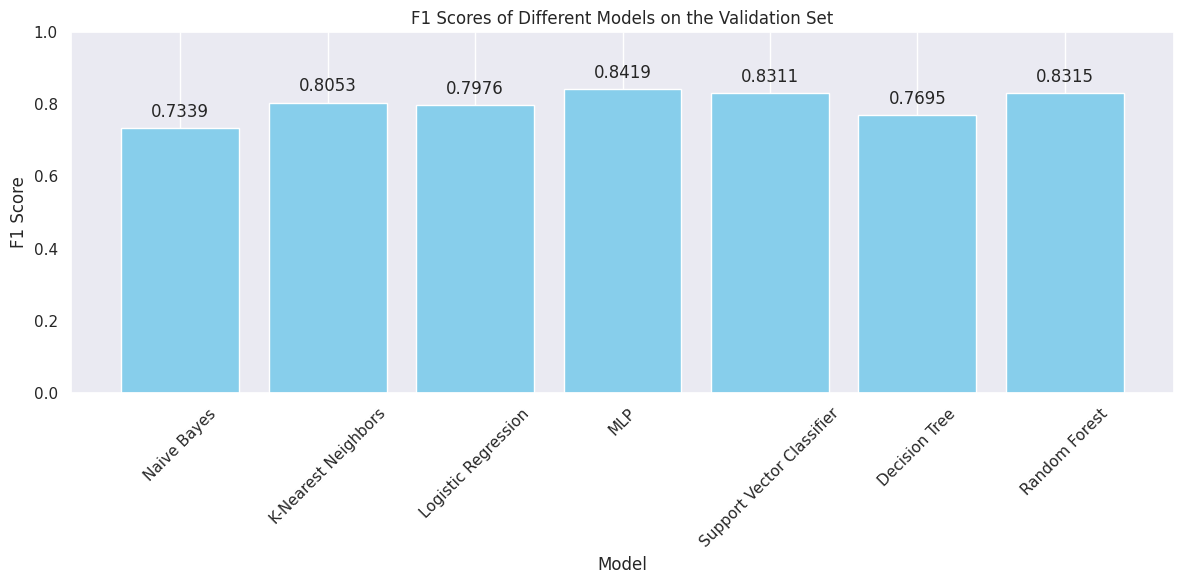

In [41]:
import matplotlib.pyplot as plt

# Extract model names and F1 scores
model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

# Create a bar plot to visualize the F1 scores of each model
plt.figure(figsize=(12, 6))
plt.bar(model_names, f1_values, color='skyblue')
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("F1 Scores of Different Models on the Validation Set")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.grid(axis='y')

# Annotate the bars with the F1 score values
for i, v in enumerate(f1_values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set).


In [51]:
# Use the best MLP model from the Grid Search results
best_mlp_model = best_models['Support Vector Classifier']

# Make predictions on the test data using the MLP model
y_test_pred_mlp = best_mlp_model.predict(kaggle_test_X)

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [52]:
# Step 3: Create a DataFrame with 'ID' and the corresponding predictions
final_kaggle_predictions = pd.DataFrame({
    'ID': kaggle_test_ids,
    'PredictedRainTomorrow': y_test_pred_mlp
})

# Step 4: Save the predictions to a CSV file with the required format
output_csv_path = "svclast.csv"
final_kaggle_predictions.to_csv(output_csv_path, index=False)

print("The predictions have been saved successfully to 'best_model_predictions.csv'.")

The predictions have been saved successfully to 'best_model_predictions.csv'.
